# Assignment 1 - Accessing APIs and Mapping  Median Household Income

<div class="alert alert-block alert-info">
<p>I've set this up as a partially autograded assignment.</p>
 
<p>The points grading is mainly for you to see where you are going right and going wrong, and to tell us where to take a closer look. You won't be penalized just because your output doesn't match what the autograder expects.</p>
    
<p>In practice, we'll grade holistically rather than a question-by-question basis, using a check, check- and check+ scale.</p>
</div>

We saw the [BART API](http://api.bart.gov/docs/overview/index.aspx) in class. 

The first question asks you to extract some station information from the API.

Create a pandas dataframe (call it `stationdf`) of all stations, including their name, lat/lon, and the other information that is returned from the station information API.



In [1]:
# You'll need a few lines of code that looks something like this
stationdf = 999 # replace 999 with your code here
print(stationdf)

### BEGIN SOLUTION
import json
import pandas as pd
import requests

APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website

# look for station codes
requestString = 'http://api.bart.gov/api/stn.aspx?cmd=stns&key={}&json=y'.format(APIkey)

# looking step by step at the output, 
# we see that the information is nested first in root, 
# then in stations, then in station

r = requests.get(requestString)
d = json.loads(r.text)
stns = d['root']['stations']['station']

# convert to a dataframe
stationdf = pd.DataFrame(stns)
### END SOLUTION

999


In [2]:
# Autograding tests - do not edit
assert len(stationdf) == 50
assert '12th St. Oakland City Center' in stationdf.name.values

What is the regular fare from Pleasant Hill to West Oakland? 

Extract the result from the API and store it in a variable called `fare`.

*Hint*: Look at your answer to the previous question to see the codes of each station.


In [3]:
# your code here
fare = 999 # replace with your answer
print('The fare is ${}'.format(fare))

### BEGIN SOLUTION

# to be clever, we'd extract the station names directly from the station dataframe
# but let's make sure this code is robust to an error in the previous question

orig, dest = 'PHIL', 'WOAK'
APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website

requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&key={}&orig={}&dest={}&json=y'.format(APIkey, orig, dest)
r = requests.get(requestString)
d = json.loads(r.text)

# Looking at d, the fare is buried down in root, then in trip, then in fare
fare = d['root']['trip']['fare']

### END SOLUTION


The fare is $999


In [4]:
# Autograding tests - do not edit
assert str(fare) == '4.10'

Now, create a function that will return the fare to West Oakland from any station.

Call your function `woak_fare()`. It should have one argument, `orig`, and return the fare.

*Hint*: Use all your code to the answer above, but indent it and put it in a function. Then, use the variable `orig` instead of your hard-coded station code for Pleasant Hill.

**NOTE**: There is an error in the autograded solution here. (They are the fares to Pleasant Hill, not West Oakland.)

In [5]:
### your code here

def woak_fare(orig):
    # contents of your function here
    fare = 999 # replace with your code here
    return fare

# example
print('Fare to Civic Center is ${}'.format(woak_fare('CIVC')))

### BEGIN SOLUTION
def woak_fare(orig):
    dest = 'WOAK'
    APIkey = 'MW9S-E7SL-26DU-VV8V'  # we don't need to define it; I just do it here in case something went wrong
    requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&key={}&orig={}&dest={}&json=y'.format(APIkey, orig, dest)
    r = requests.get(requestString)
    d = json.loads(r.text)
    fare = d['root']['trip']['fare']
    return fare

### END SOLUTION

Fare to Civic Center is $999


In [6]:
# Autograding tests - do not edit

assert str(woak_fare('CIVC')) == '5.85'
assert str(woak_fare('WARM')) == '6.85'

In the second part of the homework, let's look at getting census data through `cenpy`.

The variables available through the API for the 2020 5-year ACS <a href="https://api.census.gov/data/2020/acs/acs5/variables.html">are listed here in HTML form</a>. But you can also see what's available through `cenpy`. You can refer to the CenPy <a href="https://github.com/cenpy-devs/cenpy">documentation</a>. And check out this segregation <a href="https://nbviewer.jupyter.org/github/cenpy-devs/cenpy/blob/master/notebooks/segregation.ipynb">tutorial</a> for reference. 

Create a connection to the American Community Survey (as in the lecture notebook). Take 15 minutes to explore what variables and tables are available.

What tables have MEDIAN HOUSEHOLD INCOME? (Hint: use `filter_tables`.) Store the dataframe in the `income_tables` variable.

Hint: pandas tries to be helpful by truncating long columns. If you want to see the entire output, try:
```
import pandas as pd
pd.set_option('display.max_colwidth', None)
```

In [7]:
# You'll need a few lines of code that looks something like this
income_tables = 999 # replace 999 with your code here
print(income_tables)

### BEGIN SOLUTION
import pandas as pd
import cenpy

pd.set_option('display.max_colwidth', None)
acs = cenpy.products.ACS()
income_tables = acs.filter_tables('MEDIAN HOUSEHOLD INCOME', by='description')
#print(income_tables)

### END SOLUTION

999


In [8]:
# Autograding tests - do not edit
assert len(income_tables) == 6
assert 'B19013' in income_tables.index.values

Each of these tables has one or more variables. These should be included in the `columns` column of your new dataframe as a list. Sometimes (e.g. the first row), there is just a single variable - the list is length 1. Other tables have more variables.

Looking at your table, identify the variable that gives you median household income for all individuals (i.e., not disaggregated by race and ethnicity).

Create a geodataframe with this variable for all census tracts in the City of Oakland. 
    Hint: <a href="http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.from_place.html">from_place</a>.

In [9]:
gdf = 999 # replace 999 with your code here
print(gdf)

### BEGIN SOLUTION
gdf = acs.from_place('Oakland, CA', variables=['B19019_001E'])
print(gdf)
### END SOLUTION


999


/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Oakland, CA to Oakland city within layer Incorporated Places


/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


          GEOID  \
0   06001402400   
1   06001402900   
2   06001401200   
3   06001403400   
4   06001400300   
..          ...   
66  06001405200   
67  06001405600   
68  06001406300   
69  06001406601   
70  06001408900   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

/var/folders/b7/h5f5948x0295kq2k3khb96kc0000gn/T/ipykernel_5745/3893723026.py:5: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  gdf = acs.from_place('Oakland, CA', variables=['B19019_001E'])


In [10]:
# Autograding tests - do not edit
assert len(gdf) == 71
assert list(gdf.columns)==['GEOID', 'geometry', 'B19019_001E', 'state', 'county','tract']

Some of the columns should be self explanatory (e.g. you should have a `state` column). Others might be less helpfully named. Rename the columns to something more intuitive.

What's the maximum of the tract-level median household income?

In [11]:
max_tract_income = 999 # replace 999 with your code here
print(max_tract_income)

### BEGIN SOLUTION
gdf.rename(columns={'B19019_001E':'median_HH_income'}, inplace=True)
max_tract_income = gdf.median_HH_income.max()
print('Maximum tract-level income: ${:,.0f}'.format(max_tract_income))
### END SOLUTION

999
Maximum tract-level income: $115,563


In [12]:
# Autograding tests - do not edit
assert max_tract_income == 115563

Spend a bit more time exploring the descriptive statistics (e.g., maximum and minimum median household income). 

Then plot median household income at the tract level. Include a basemap using `contextily` (follow the example from class).

If you are inclined, see if you can figure out some of the other `contextily` and plotting options, such as transparency (alpha), colormaps, zoom levels, and so on.

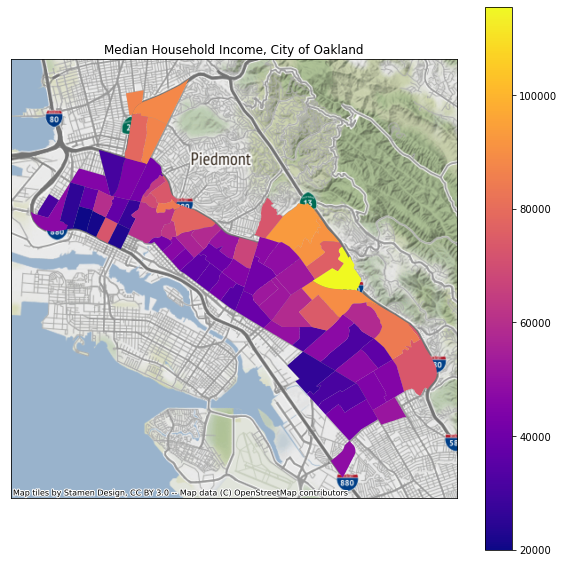

In [29]:
import matplotlib.pyplot as plt
import contextily as ctx

# your code here

### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot('median_HH_income', ax=ax, cmap='plasma', legend=True)

ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Median Household Income, City of Oakland')


### END SOLUTION

Final product should look something like this: 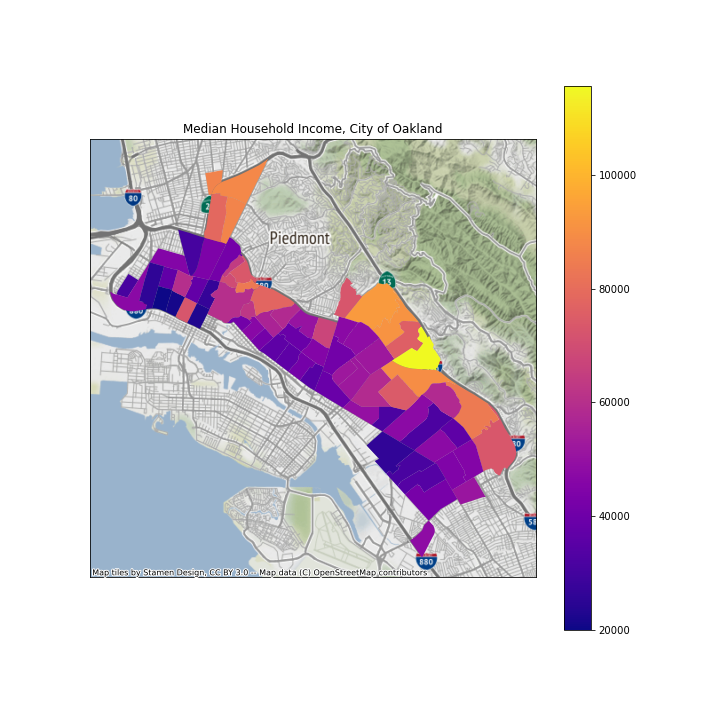

# Challenge Problem
Remember, you need to do at least two of these challenge problems during the quarter.

Look at the US EPA [AirNow API](https://docs.airnowapi.org). You'll need to register for your own API key - click on Log In and follow the steps to request an account. You'll get your key within a minute.

Once you a logged in, look at the Web Services, and then Observations by Monitoring Site. If you click on the Query Tool, you can build up a query in the point-and-click interface. This will help you understand the API syntax.

Back in Python, use the `requests` library to get all the data for PM 2.5 for each day in 2021, in the approximate LA County area (you might have to play around with the bounding box). Return this as a pandas dataframe.

Put this in a function that takes at least one argument. For example, you could write a function where you pass the year, or the pollutant type. Your function should return a dataframe with the results of your API query.

Then, map or plot the data in whatever way you choose (e.g. boxplots or line charts of pollution levels). 

If you want to map it, [here's some advice on how to convert a pandas dataframe into a geodataframe](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html), using the lat and lon columns returned by the API.                                                                           



In [ ]:
# your code here